# AdaBoost
(C) 2018 Dariusz Kajtoch

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('notebook')
plt.rcParams['text.usetex'] = True

tab20 = plt.get_cmap('tab20').colors

In [57]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=400, noise=0.3, random_state=0)

In [137]:
# Plot decision boundary for a binary classifier
def plot_decision_boundary( ax, X, y, clf ):
    
    # we assume that X has only two features
    xmin = np.min( X[:,0] ) - 0.1
    xmax = np.max( X[:,0] ) + 0.1
    ymin = np.min( X[:,1] ) - 0.1
    ymax = np.max( X[:,1] ) + 0.1
    
    # create a grid of points
    xx, yy = np.meshgrid( np.linspace(xmin,xmax,100),
                          np.linspace(ymin,ymax,100)
                        )
    
    # predict output
    X_predict = np.c_[ xx.ravel(), yy.ravel() ]
    Z = clf.predict( X_predict )
    
    Z_reshaped = Z.reshape( xx.shape )
    
    # assign color to the output
    from matplotlib import colors
    cmap_back = colors.ListedColormap( [tab20[1], tab20[3]] )
    ax.pcolormesh( 
        xx, yy, Z_reshaped, 
        cmap=cmap_back,
        edgecolors='None',
        alpha=0.4
    )
    
    for binary, color in zip([0,1],[tab20[0],tab20[2]]):
        ax.scatter( 
            X[y==binary][:,0],
            X[y==binary][:,1],
            c=color, # colors
            s=30., # scale
            alpha=1.0, # trasparency
            edgecolor='0.5'
        )

# AdaBoost with weak Decision Tree

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

weak = DecisionTreeClassifier(
    criterion='gini',
    max_depth=1,
    random_state=54
)

clf = AdaBoostClassifier(
    base_estimator=weak,
    n_estimators=100,
    learning_rate=1.0,
    algorithm='SAMME',
    random_state=54
)

clf.fit(X,y)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=54,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=54)

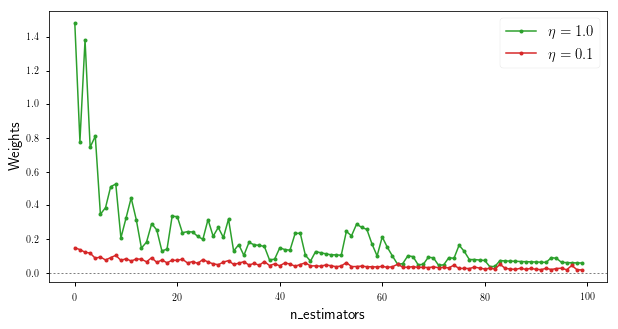

In [159]:
plt.close()

fig, ax = plt.subplots(figsize=(10,5))

clf = AdaBoostClassifier(
    base_estimator=weak,
    n_estimators=100,
    learning_rate=1.0,
    algorithm='SAMME',
    random_state=54
)
clf.fit(X,y)

ax.plot(clf.estimator_weights_, lw=1.5, marker='o', ms=4, color=tab20[4], label='$\eta = 1.0$')

clf = AdaBoostClassifier(
    base_estimator=weak,
    n_estimators=100,
    learning_rate=0.1,
    algorithm='SAMME',
    random_state=54
)
clf.fit(X,y)

ax.plot(clf.estimator_weights_, lw=1.5, marker='o', ms=4, color=tab20[6], label='$\eta = 0.1$')

ax.set_xlabel('n\_estimators', fontsize=15)
ax.set_ylabel('Weights', fontsize=15)
ax.legend(fontsize=15)

ax.axhline(linewidth=1., color='0.5', dashes=[2,2])

plt.savefig('AdaBoost_DecisionTree_learning.png', bbox_inches='tight', dpi=400)

Text(0.5,1,'No. Estimators: 50')

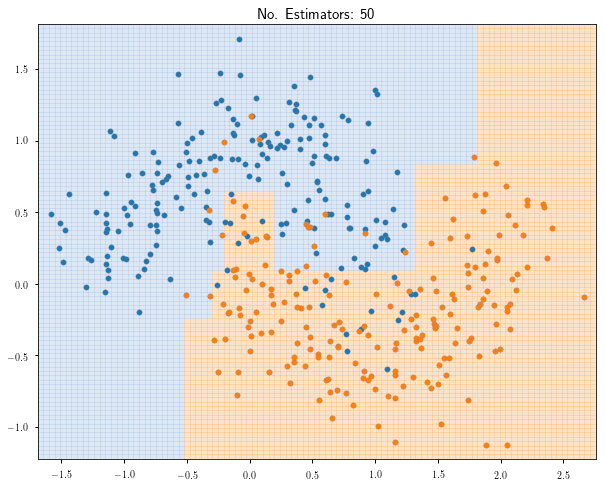

In [138]:
plt.close()

fig, ax = plt.subplots(figsize=(10,8))

plot_decision_boundary(ax, X, y, clf)
ax.set_title('No. Estimators: 50', fontsize=15)

frame: 1
frame: 2
frame: 3
frame: 4
frame: 5
frame: 6
frame: 7
frame: 8
frame: 9
frame: 10
frame: 11
frame: 12
frame: 13
frame: 14
frame: 15
frame: 16
frame: 17
frame: 18
frame: 19
frame: 20
frame: 21
frame: 22
frame: 23
frame: 24
frame: 25
frame: 26
frame: 27
frame: 28
frame: 29
frame: 30
frame: 31
frame: 32
frame: 33
frame: 34
frame: 35
frame: 36
frame: 37
frame: 38
frame: 39
frame: 40
frame: 41
frame: 42
frame: 43
frame: 44
frame: 45
frame: 46
frame: 47
frame: 48
frame: 49
frame: 50
frame: 51
frame: 52
frame: 53
frame: 54
frame: 55
frame: 56
frame: 57
frame: 58
frame: 59
frame: 60
frame: 61
frame: 62
frame: 63
frame: 64
frame: 65
frame: 66
frame: 67
frame: 68
frame: 69
frame: 70
frame: 71
frame: 72
frame: 73
frame: 74
frame: 75
frame: 76
frame: 77
frame: 78
frame: 79
frame: 80
frame: 81
frame: 82
frame: 83
frame: 84
frame: 85
frame: 86
frame: 87
frame: 88
frame: 89
frame: 90
frame: 91
frame: 92
frame: 93
frame: 94
frame: 95
frame: 96
frame: 97
frame: 98
frame: 99
frame: 100


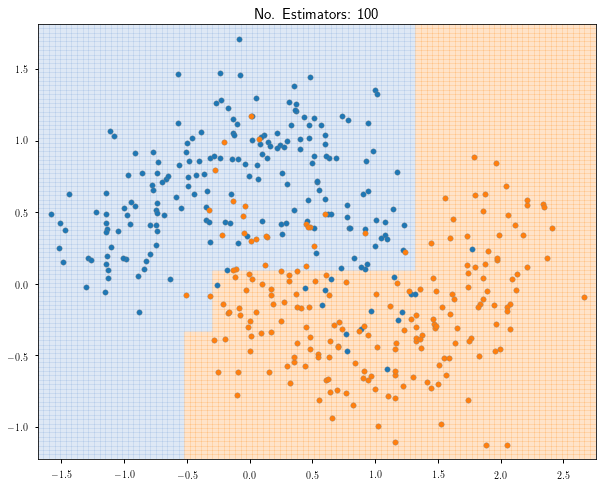

In [143]:
# make animation
from matplotlib.animation import FuncAnimation

plt.close()

fig, ax = plt.subplots(figsize=(10,8))

def update(frame_number):
    clf = AdaBoostClassifier(
        base_estimator=weak,
        n_estimators=frame_number,
        learning_rate=0.1,
        algorithm='SAMME',
        random_state=54
        )

    clf.fit(X,y)
    
    plot_decision_boundary(ax, X, y, clf)
    ax.set_title('No. Estimators: %d'%frame_number, fontsize=15)
    
for i in range(1,101):
    plt.cla()
    update(i)
    plt.savefig('./frames/frame_%d.png'%i, bbox_inches='tight', dpi=200)
    print('frame: %d' % i)

In [144]:
!ffmpeg -r 4 -i ./frames/frame_%d.png -c:v libx264 -vf fps=4 ./frames/AdaBoost_DecisionTree_lr=0p1.mp4

ffmpeg version 2.8.14-0ubuntu0.16.04.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 5.4.0 (Ubuntu 5.4.0-6ubuntu1~16.04.9) 20160609
  configuration: --prefix=/usr --extra-version=0ubuntu0.16.04.1 --build-suffix=-ffmpeg --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --cc=cc --cxx=g++ --enable-gpl --enable-shared --disable-stripping --disable-decoder=libopenjpeg --disable-decoder=libschroedinger --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librtmp --enable-libschroedinger --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --e

# AdaBoost with Logistic Regression

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

weak = LogisticRegression(
    random_state=54
)

clf = AdaBoostClassifier(
    base_estimator=weak,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME',
    random_state=54
)

clf.fit(X,y)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=54, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=54)

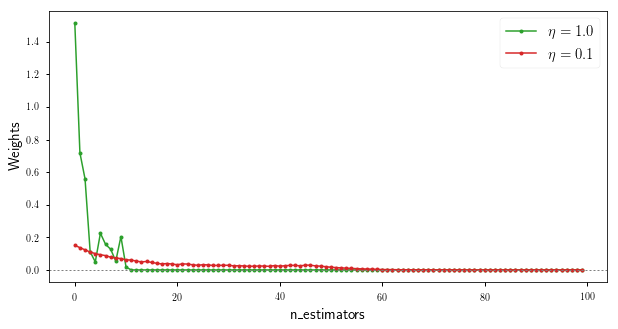

In [161]:
plt.close()

fig, ax = plt.subplots(figsize=(10,5))

clf = AdaBoostClassifier(
    base_estimator=weak,
    n_estimators=100,
    learning_rate=1.0,
    algorithm='SAMME',
    random_state=54
)
clf.fit(X,y)

ax.plot(clf.estimator_weights_, lw=1.5, marker='o', ms=4, color=tab20[4], label='$\eta = 1.0$')

clf = AdaBoostClassifier(
    base_estimator=weak,
    n_estimators=100,
    learning_rate=0.1,
    algorithm='SAMME',
    random_state=54
)
clf.fit(X,y)

ax.plot(clf.estimator_weights_, lw=1.5, marker='o', ms=4, color=tab20[6], label='$\eta = 0.1$')

ax.set_xlabel('n\_estimators', fontsize=15)
ax.set_ylabel('Weights', fontsize=15)
ax.legend(fontsize=15)

ax.axhline(linewidth=1., color='0.5', dashes=[2,2])

plt.savefig('AdaBoost_LogisticRegression_learning.png', bbox_inches='tight', dpi=400)

frame: 1
frame: 2
frame: 3
frame: 4
frame: 5
frame: 6
frame: 7
frame: 8
frame: 9
frame: 10
frame: 11
frame: 12
frame: 13
frame: 14
frame: 15
frame: 16
frame: 17
frame: 18
frame: 19
frame: 20
frame: 21
frame: 22
frame: 23
frame: 24
frame: 25
frame: 26
frame: 27
frame: 28
frame: 29
frame: 30
frame: 31
frame: 32
frame: 33
frame: 34
frame: 35
frame: 36
frame: 37
frame: 38
frame: 39
frame: 40
frame: 41
frame: 42
frame: 43
frame: 44
frame: 45
frame: 46
frame: 47
frame: 48
frame: 49
frame: 50
frame: 51
frame: 52
frame: 53
frame: 54
frame: 55
frame: 56
frame: 57
frame: 58
frame: 59
frame: 60
frame: 61
frame: 62
frame: 63
frame: 64
frame: 65
frame: 66
frame: 67
frame: 68
frame: 69
frame: 70
frame: 71
frame: 72
frame: 73
frame: 74
frame: 75
frame: 76
frame: 77
frame: 78
frame: 79
frame: 80
frame: 81
frame: 82
frame: 83
frame: 84
frame: 85
frame: 86
frame: 87
frame: 88
frame: 89
frame: 90
frame: 91
frame: 92
frame: 93
frame: 94
frame: 95
frame: 96
frame: 97
frame: 98
frame: 99
frame: 100


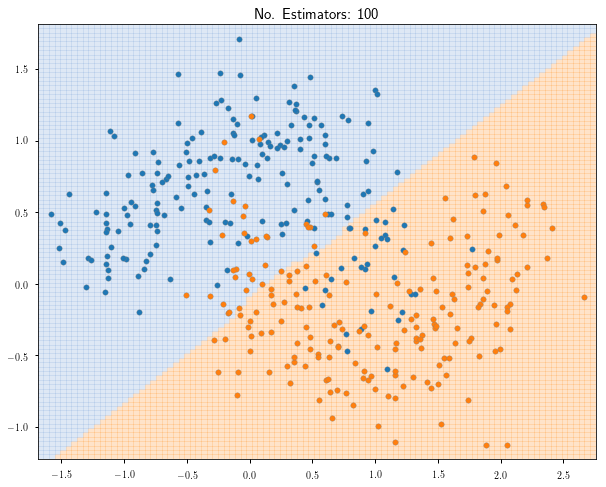

In [164]:
# make animation
from matplotlib.animation import FuncAnimation

plt.close()

fig, ax = plt.subplots(figsize=(10,8))

def update(frame_number):
    clf = AdaBoostClassifier(
        base_estimator=weak,
        n_estimators=frame_number,
        learning_rate=0.1,
        algorithm='SAMME',
        random_state=54
        )

    clf.fit(X,y)
    
    plot_decision_boundary(ax, X, y, clf)
    ax.set_title('No. Estimators: %d'%frame_number, fontsize=15)
    
for i in range(1,101):
    plt.cla()
    update(i)
    plt.savefig('./frames/frame_%d.png'%i, bbox_inches='tight', dpi=200)
    print('frame: %d' % i)

In [165]:
!ffmpeg -r 4 -i ./frames/frame_%d.png -c:v libx264 -vf fps=4 ./frames/AdaBoost_LogisticRegression_lr=0p1.mp4

ffmpeg version 2.8.14-0ubuntu0.16.04.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 5.4.0 (Ubuntu 5.4.0-6ubuntu1~16.04.9) 20160609
  configuration: --prefix=/usr --extra-version=0ubuntu0.16.04.1 --build-suffix=-ffmpeg --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --cc=cc --cxx=g++ --enable-gpl --enable-shared --disable-stripping --disable-decoder=libopenjpeg --disable-decoder=libschroedinger --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librtmp --enable-libschroedinger --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --e